# MTG, Easy as A.B.C.
*By Anthony Broussard, Brandon Pimentel, and Charles Zieres*

Our team is using the data from a Magic: the Gathering (MTG) dataset available [HERE](https://www.kaggle.com/datasets/camilonunez/magic-the-gathering-top8-some-decks-and-events/data)

We will develop a predictive model that estimates the win probability of a given deck in tournaments utilizing the deck's total price as a primary feature. In this project, we aim to understand the relationship between deck price and performance, in order to gauge the extent to which monetary investment has an impact on success chances.

**Environment setup:**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt






In [ ]:
# Data Import from Local Repository

df_prices = pd.read_csv('./data/cardPrices.csv')
df_cards = pd.read_csv('./data/cards.csv')

**Preprocessing:**

**Exploration & visualization:**

In [6]:
# Get general info about current datasets

df_cards.info()
df_cards.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89611 entries, 0 to 89610
Data columns (total 78 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   artist                   89602 non-null  object 
 1   artistIds                89602 non-null  object 
 2   asciiName                217 non-null    object 
 3   attractionLights         135 non-null    object 
 4   availability             89611 non-null  object 
 5   boosterTypes             48416 non-null  object 
 6   borderColor              89611 non-null  object 
 7   cardParts                18 non-null     object 
 8   colorIdentity            79757 non-null  object 
 9   colorIndicator           792 non-null    object 
 10  colors                   70287 non-null  object 
 11  defense                  52 non-null     float64
 12  duelDeck                 1594 non-null   object 
 13  edhrecRank               82651 non-null  float64
 14  edhrecSaltiness       

,defense,edhrecRank,edhrecSaltiness,faceConvertedManaCost,faceManaValue,hand,life,manaValue
count,52.000000,82651.000000,67213.000000,3369.000000,3369.000000,119.000000,119.000000,89611.000000
mean,4.634615,10029.261582,0.333075,2.232710,2.232710,0.084034,1.084034,25.319286
std,1.010316,7862.083733,0.328288,2.000858,2.000858,1.211385,5.683130,4724.225807
min,3.000000,1.000000,0.010000,0.000000,0.000000,-4.000000,-8.000000,0.000000
25%,4.000000,2881.000000,0.120000,0.000000,0.000000,-1.000000,-3.000000,2.000000
50%,4.000000,8527.000000,0.240000,2.000000,2.000000,0.000000,0.000000,3.000000
75%,5.000000,16430.500000,0.410000,3.000000,3.000000,1.000000,4.000000,4.000000
max,7.000000,26570.000000,2.990000,11.000000,11.000000,3.000000,30.000000,1000000.000000


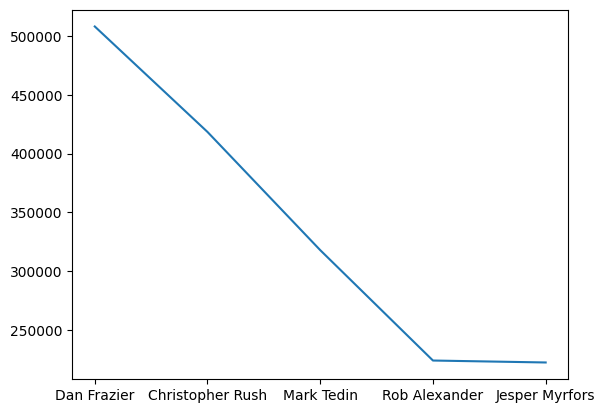

In [7]:
# Display artists total worth for each unique card designed

df_comb = pd.merge(df_cards, df_prices, on='uuid')

df_comb.groupby(['artist']).price.sum().sort_values(ascending=False)

artVal = df_comb.groupby(['artist']).price.sum().sort_values(ascending=False)

plt.plot(artVal[:5])
plt.show()

**Machine Learning Prep:**